### Loading Our data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from google.colab import drive # Library to mount google drives
import warnings
warnings.filterwarnings("ignore")

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Specify the base directory where images are located.
base_dir = '/content/gdrive/My Drive/'

In [ ]:

train_df = pd.read_csv('/content/gdrive/My Drive/loan_sanction_train.csv')
test_df = pd.read_csv('/content/gdrive/My Drive/loan_sanction_test.csv')
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
train_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,367.0,4805.599455,4910.685399,0.0,2864.00,3786.0,5060.0,72529.0
CoapplicantIncome,367.0,1569.577657,2334.232099,0.0,0.00,1025.0,2430.5,24000.0
LoanAmount,362.0,136.132597,61.366652,28.0,100.25,125.0,158.0,550.0
Loan_Amount_Term,361.0,342.537396,65.156643,6.0,360.00,360.0,360.0,480.0
Credit_History,338.0,0.825444,0.380150,0.0,1.00,1.0,1.0,1.0


In [ ]:
train_df.shape

(614, 13)

In [ ]:
test_df.shape

(367, 12)

In [ ]:
train_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:

# Duplicated data
train_df[train_df.duplicated() == True]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


Here we checked for duplicate values and we can see there is no duplicate values.

## Missing values and outliers treatment

In [ ]:
train_df.isnull().values.any()

True

In [ ]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#Filling the Missing Values

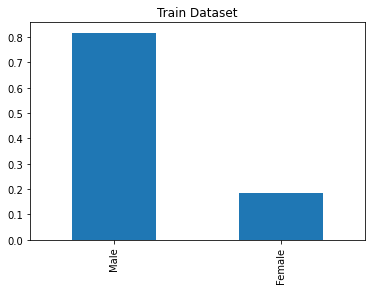

In [ ]:
#One approach to fill missing values in categorical data can be to replace them with the most common or occurring values.
ax1 = train_df['Gender'].value_counts(normalize=True).plot.bar(title='Train Dataset')
plt.show()

In [ ]:
train_df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

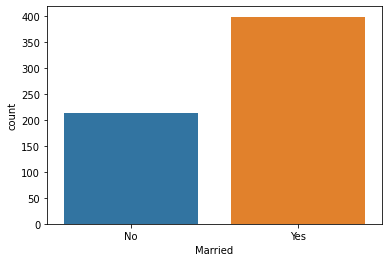

In [ ]:
sns.countplot(train_df['Married'])

In [ ]:

train_df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

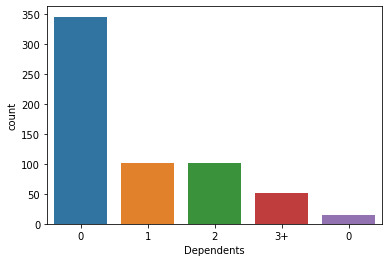

In [ ]:
sns.countplot(train_df['Dependents'])

In [ ]:

train_df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
0      15
Name: Dependents, dtype: int64

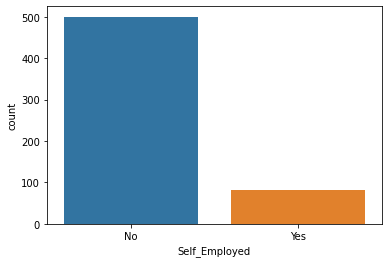

In [ ]:
sns.countplot(train_df['Self_Employed'])

In [ ]:

train_df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [ ]:
train_df['Married'] = train_df['Married'].replace(np.nan,'Yes')
train_df['Dependents'] = train_df['Dependents'].replace(np.nan,'0')
train_df['Self_Employed'] = train_df['Self_Employed'].replace(np.nan,'No')
train_df['Gender'] = train_df['Gender'].replace(np.nan,'Male')

In [ ]:

train_df['LoanAmount'] = train_df['LoanAmount'].fillna(train_df['LoanAmount'].median())
train_df['Loan_Amount_Term'] = train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].median())
train_df['Credit_History'] = train_df['Credit_History'].fillna(train_df['Credit_History'].median())

In [ ]:
100*train_df.isnull().sum()/len(train_df)